In [1]:
# BASE
# ------------------------------------------------------
import numpy as np
import pandas as pd
import os
import gc
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.pyplot import MultipleLocator

# TIME
# ------------------------------------------------------
import time
import datetime
from datetime import timedelta

# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm

from scipy import interpolate

In [2]:
# for dirname, _, filenames in os.walk('//srv-mla/MLA_ADP2022/Tags_2018'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# Import
ID_52 = pd.read_csv('D:\留德十年\TUD\ADP\Data\TagID_052_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
ID_58 = pd.read_csv('D:\留德十年\TUD\ADP\Data\TagID_058_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
print(f'TagID_052_2018.csv : {ID_52.shape}')
print(f'TagID_058_2018.csv : {ID_58.shape}')
ID_52["CreateDateTime"]=pd.to_datetime(ID_52["CreateDateTime"])
ID_58["CreateDateTime"]=pd.to_datetime(ID_58["CreateDateTime"])
ID_52.head(5)

TagID_052_2018.csv : (6280817, 3)
TagID_058_2018.csv : (4385051, 3)


,CreateDateTime,TagValue,TagId
0,2018-08-23 10:42:57.278,6.047454,52
1,2018-08-23 10:42:58.299,5.700232,52
2,2018-08-23 10:42:59.301,5.758102,52
3,2018-08-23 10:43:01.297,5.700232,52
4,2018-08-23 10:43:02.297,5.758102,52


In [4]:
ID_58

,CreateDateTime,TagValue,TagId
0,2018-08-23 10:42:57.278,-0.752315,58
1,2018-08-23 10:42:59.301,-0.520833,58
2,2018-08-23 10:43:00.295,-0.462963,58
3,2018-08-23 10:43:01.297,-0.607639,58
4,2018-08-23 10:43:02.297,-0.694444,58
...,...,...,...
4385046,2018-12-31 23:31:57.991,-1.302083,58
4385047,2018-12-31 23:48:41.412,-1.331019,58
4385048,2018-12-31 23:48:42.413,-1.302083,58
4385049,2018-12-31 23:54:01.910,-1.331019,58


In [5]:
ID_58['TagValue'].value_counts()

-1.128472    247368
-1.099537    246994
-1.157407    227433
-1.041667    207362
-1.186343    194697
              ...  
-5.324074         1
-5.034722         1
 4.947917         1
-5.005787         1
-5.063657         1
Name: TagValue, Length: 278, dtype: int64

In [6]:
v = ID_58[ID_58['TagValue']>10]
print(v['TagValue'])

Series([], Name: TagValue, dtype: float64)


In [7]:
c = ID_52[ID_52['TagValue']>10]
print(c['TagValue'])

Series([], Name: TagValue, dtype: float64)


In [8]:
ID_52_58=ID_52.set_index('CreateDateTime').join(ID_58.set_index('CreateDateTime'),lsuffix='_52', rsuffix='_58',how='outer')
ID_52_58

,TagValue_52,TagId_52,TagValue_58,TagId_58
CreateDateTime,,,,
2018-08-23 10:42:57.278,6.047454,52.0,-0.752315,58.0
2018-08-23 10:42:58.299,5.700232,52.0,NaN,NaN
2018-08-23 10:42:59.301,5.758102,52.0,-0.520833,58.0
2018-08-23 10:43:00.295,NaN,NaN,-0.462963,58.0
2018-08-23 10:43:01.297,5.700232,52.0,-0.607639,58.0
...,...,...,...,...
2018-12-31 23:59:47.521,2.604167,52.0,NaN,NaN
2018-12-31 23:59:48.524,2.575232,52.0,NaN,NaN
2018-12-31 23:59:54.564,2.604167,52.0,NaN,NaN


In [9]:
ID_52_58 = ID_52_58.interpolate()
ID_52_58

,TagValue_52,TagId_52,TagValue_58,TagId_58
CreateDateTime,,,,
2018-08-23 10:42:57.278,6.047454,52.0,-0.752315,58.0
2018-08-23 10:42:58.299,5.700232,52.0,-0.636574,58.0
2018-08-23 10:42:59.301,5.758102,52.0,-0.520833,58.0
2018-08-23 10:43:00.295,5.729167,52.0,-0.462963,58.0
2018-08-23 10:43:01.297,5.700232,52.0,-0.607639,58.0
...,...,...,...,...
2018-12-31 23:59:47.521,2.604167,52.0,-1.302083,58.0
2018-12-31 23:59:48.524,2.575232,52.0,-1.302083,58.0
2018-12-31 23:59:54.564,2.604167,52.0,-1.302083,58.0


In [10]:
ID_52_58 = ID_52_58.reset_index('CreateDateTime')
ID_52_58.loc[806000:806050]

,CreateDateTime,TagValue_52,TagId_52,TagValue_58,TagId_58
806000,2018-09-03 17:39:18.051,2.912809,52.0,-0.405093,58.0
806001,2018-09-03 17:39:19.055,2.903163,52.0,-0.578704,58.0
806002,2018-09-03 17:39:20.064,2.893518,52.0,-0.665509,58.0
806003,2018-09-03 17:39:21.072,2.922454,52.0,-0.723380,58.0
806004,2018-09-03 17:39:23.085,2.893518,52.0,-0.752315,58.0
806005,2018-09-03 17:39:24.087,2.922454,52.0,0.072338,58.0
806006,2018-09-03 17:39:27.108,2.893518,52.0,0.896991,58.0
806007,2018-09-03 17:39:28.109,2.922454,52.0,-0.607639,58.0
806008,2018-09-03 17:39:29.117,2.907986,52.0,-0.549769,58.0
806009,2018-09-03 17:39:30.122,2.893518,52.0,-0.665509,58.0


In [11]:
ID_52_58.loc[806000:806050]

,CreateDateTime,TagValue_52,TagId_52,TagValue_58,TagId_58
806000,2018-09-03 17:39:18.051,2.912809,52.0,-0.405093,58.0
806001,2018-09-03 17:39:19.055,2.903163,52.0,-0.578704,58.0
806002,2018-09-03 17:39:20.064,2.893518,52.0,-0.665509,58.0
806003,2018-09-03 17:39:21.072,2.922454,52.0,-0.723380,58.0
806004,2018-09-03 17:39:23.085,2.893518,52.0,-0.752315,58.0
806005,2018-09-03 17:39:24.087,2.922454,52.0,0.072338,58.0
806006,2018-09-03 17:39:27.108,2.893518,52.0,0.896991,58.0
806007,2018-09-03 17:39:28.109,2.922454,52.0,-0.607639,58.0
806008,2018-09-03 17:39:29.117,2.907986,52.0,-0.549769,58.0
806009,2018-09-03 17:39:30.122,2.893518,52.0,-0.665509,58.0


In [12]:
a = ID_52_58[ID_52_58['TagValue_58']>10]
print(a['TagValue_58'])

Series([], Name: TagValue_58, dtype: float64)


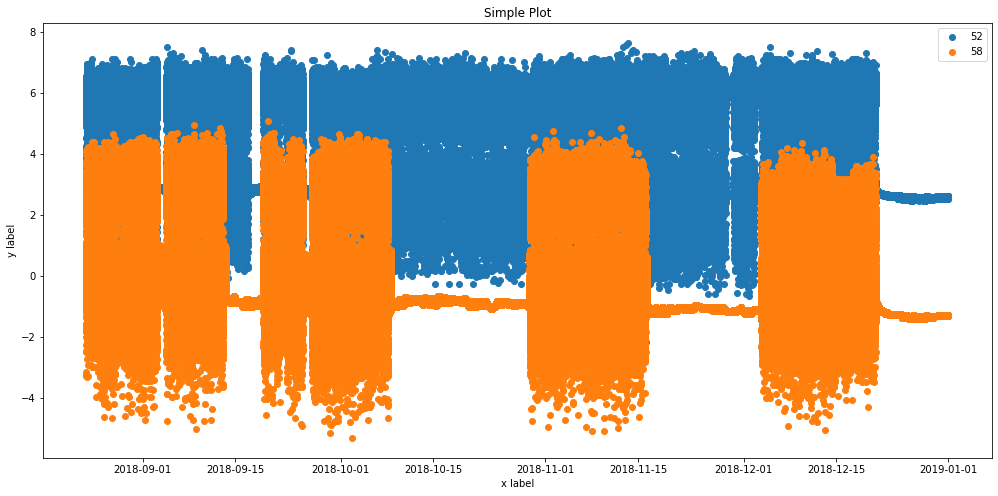

In [13]:
x = ID_52_58['CreateDateTime']
fig, ax = plt.subplots(figsize=(17,8))
ax.scatter(x, ID_52_58['TagValue_52'], label='52') 
ax.scatter(x, ID_52_58['TagValue_58'], label='58')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [14]:
ID_52_58_1 = ID_52_58[(ID_52_58['CreateDateTime']>'2018-11-09 00:05:00')&(ID_52_58['CreateDateTime']<'2018-11-09 00:10:00')]
ID_52_58_1

,CreateDateTime,TagValue_52,TagId_52,TagValue_58,TagId_58
4954636,2018-11-09 00:05:00.049,5.700232,52.0,-1.051311,58.0
4954637,2018-11-09 00:05:02.061,6.221065,52.0,-0.998264,58.0
4954638,2018-11-09 00:05:03.062,5.758102,52.0,-0.945216,58.0
4954639,2018-11-09 00:05:04.065,5.815972,52.0,-0.892168,58.0
4954640,2018-11-09 00:05:05.073,5.758102,52.0,-0.839120,58.0
...,...,...,...,...,...
4954898,2018-11-09 00:09:55.339,5.642361,52.0,-0.868055,58.0
4954899,2018-11-09 00:09:56.345,5.613426,52.0,-0.578704,58.0
4954900,2018-11-09 00:09:57.349,5.642361,52.0,-0.896991,58.0
4954901,2018-11-09 00:09:58.348,5.656829,52.0,-1.012731,58.0


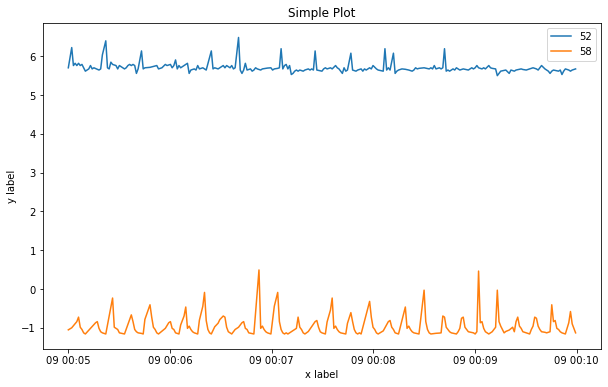

In [15]:
x = ID_52_58_1['CreateDateTime']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, ID_52_58_1['TagValue_52'], label='52') 
ax.plot(x, ID_52_58_1['TagValue_58'], label='58')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.